# **Name   : Y.Sai Santhoshi**   
# **TASK 3 : Prediction Using Decision Tree Algorithm**

In [68]:
#Importing libraries which are required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets

In [69]:
#Reading the data
df = sns.load_dataset('iris')

**Pre-Processing Steps of Data**

In [70]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [71]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [73]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [74]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

**Checking the Relation ship between Columns**

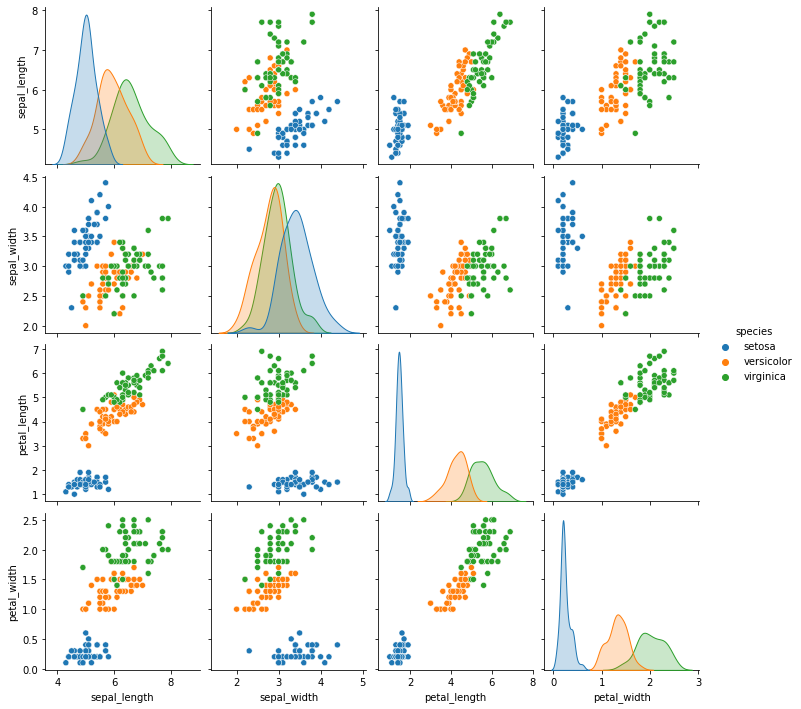

In [75]:
sns.pairplot(df, hue='species')

**Finding the Frequency of Columns using Histogram**

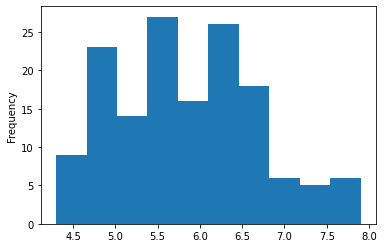

In [76]:
df['sepal_length'].plot.hist()
plt.show()

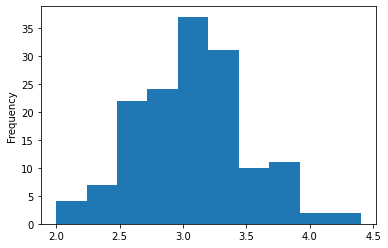

In [77]:
df['sepal_width'].plot.hist()
plt.show()

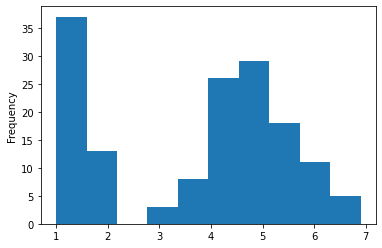

In [78]:
df['petal_length'].plot.hist()
plt.show()

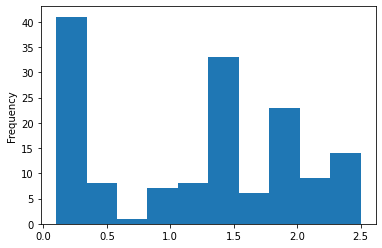

In [79]:
df['petal_width'].plot.hist()
plt.show()

**Splitting the data**

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split

In [81]:
#Training the Model
all_inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
all_classes = df['species']
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

# DECISION TREE ALGORITHM

In [82]:
from sklearn.tree import DecisionTreeClassifier

**Decision Tree fit between train_inputs and train_classes**

In [83]:
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Visualization of Decision Tree of TRAIN DATA**

Visualization of Decision tree for TRAIN DATA


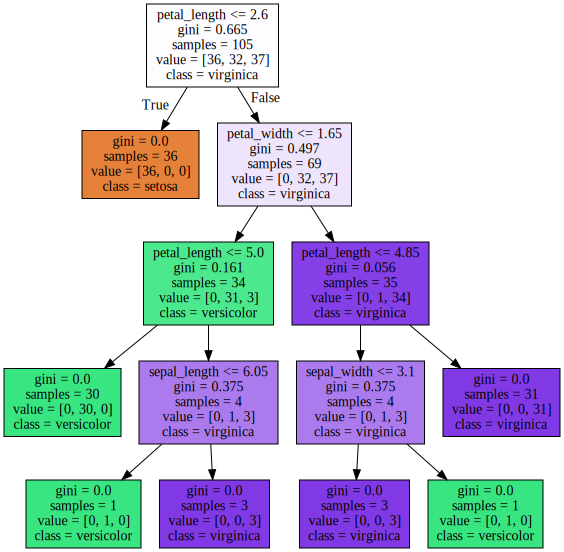

In [84]:
print("Visualization of Decision tree for TRAIN DATA")
import graphviz
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(dtc,
                                out_file=None,
                                feature_names=train_inputs.columns,
                                class_names=["setosa","versicolor","virginica"],
                                filled=True))

**Evaluating Model**

The Error Metrics of **Decision Tree** algorithm are:       
1)Accuracy    
2)Precision   
3)Recall  
4)Sensitivity  
5)Specificity  
6)F1_Score

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Evaluating the Error Metrics for **trained data**

In [86]:
pred_train=dtc.predict(train_inputs)

In [87]:
accuracy=accuracy_score(train_classes,pred_train)
precision=precision_score(train_classes,pred_train,average='micro')
recall=accuracy_score(train_classes,pred_train)
sensitivity=recall
specificity=1-sensitivity
F1_train=(2*precision*recall)/(precision+recall)
print("Error metrics of TRAIN DATA")
print("Accuracy    : ",accuracy)
print("Precision   : ",precision)
print("Recall      : ",recall)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)
print("F1_Score    : ",F1_train)

Error metrics of TRAIN DATA
Accuracy    :  1.0
Precision   :  1.0
Recall      :  1.0
Sensitivity :  1.0
Specificity :  0.0
F1_Score    :  1.0


Evaluating the Error Metrics for **Test Data**

In [88]:
pred_test=dtc.predict(test_inputs)

In [89]:
accuracy1=accuracy_score(test_classes,pred_test)
precision1=precision_score(test_classes,pred_test,average='micro')
recall1=accuracy_score(test_classes,pred_test)
sensitivity1=recall1
specificity1=1-sensitivity1
F1_test=(2*precision1*recall1)/(precision1+recall1)
print("Error metrics of TEST DATA")
print("Accuracy    : ",accuracy1)
print("Precision   : ",precision1)
print("Recall      : ",recall1)
print("Sensitivity : ",sensitivity1)
print("Specificity : ",specificity1)
print("F1_Score    : ",F1_test)

Error metrics of TEST DATA
Accuracy    :  0.9555555555555556
Precision   :  0.9555555555555556
Recall      :  0.9555555555555556
Sensitivity :  0.9555555555555556
Specificity :  0.0444444444444444
F1_Score    :  0.9555555555555556


# **Visualizing Decision Tree for whole IRIS Data**

In [90]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(all_inputs, all_classes)

**Text Representation of this Decision Tree**

In [91]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



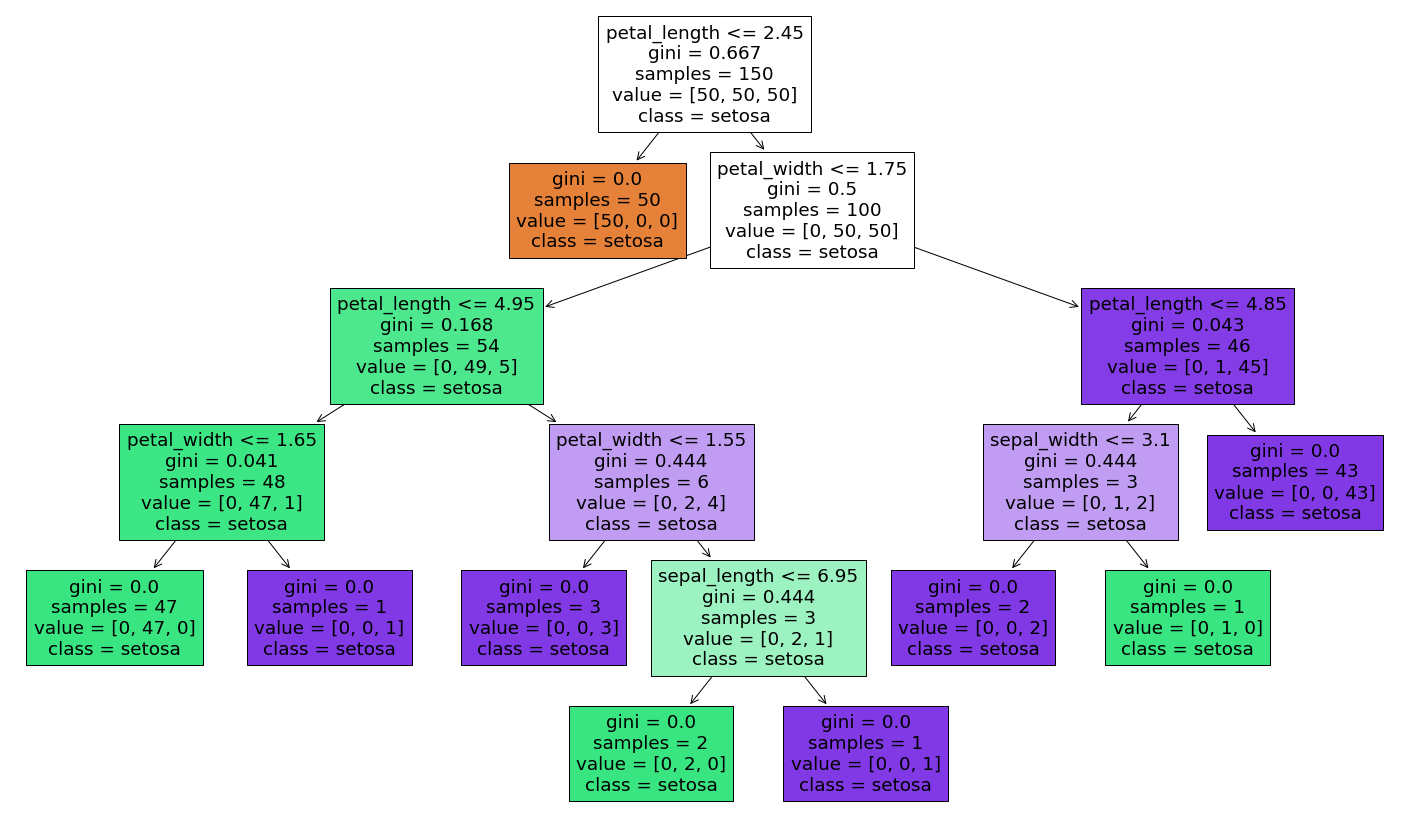

In [92]:
#Visualization of Decision Tree
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns[:-1],  
                   class_names=df['species'],
                   filled=True)

**We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**